# Assignment Title: Unsupervised Learning with Dimensionality Reduction and Clustering

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


~ Submitted By : Manolina Das 

We shall work with the MNIST handwritten digits' image dataset. The details about the dataset is available [here](https://en.wikipedia.org/wiki/MNIST_database).

We need the scikit-learn library to import the various machine learning models for our study.

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## Question 1. Complete the following lines of code for K-Means clustering

In [8]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# kmeans = ...
# clusters = ...
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


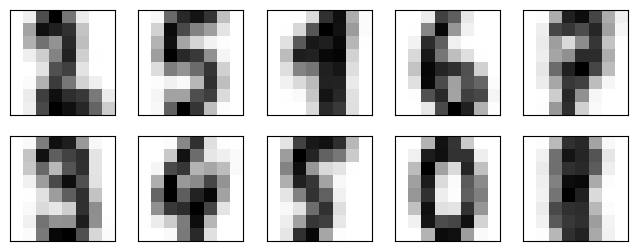

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits.

Next, we shall apply dimensionality reduction of MNIST handwritten datasets with PCA

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

## Question 2. Complete the following lines of code for

Step 1. Dimensionality reduction with PCA. The 8x8=64 dimensional data need to be reduced to 2-dimensional.

Step 2. K-means clustering should be done on the reduced dimensional data. Initial K value should be set to 10 like before.

Step 3. Visualization code is supplied below.

In [11]:
# data loading
data = digits.data

# PCA dimensionality reduction
model = PCA(n_components=2)
reduced_data = model.fit_transform(data)

# K-Means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(reduced_data)

**Data Visualization**

We shall visualize the reduced dimension and cluster data (overlapped) with the help of the following code snippet.

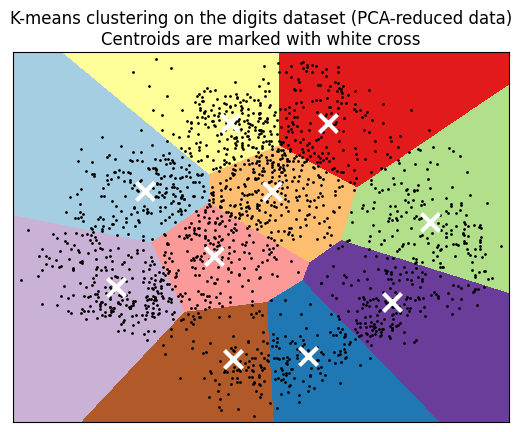

In [12]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
clusters = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
clusters = clusters.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    clusters,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Question 3.

Find a high dimensional dataset of you choice. Show how you load the dataset. Do the basic exploratory data analysis to become familiar with the dataset.


**Solution:**  
I have chosen the **Wine dataset** because it is a well-known benchmark dataset in machine learning that contains **178 samples with 13 numerical features** related to the chemical composition of wines. This makes it a **high-dimensional dataset**, which is suitable for applying dimensionality reduction techniques like PCA.

Moreover, the dataset has **three natural classes (wine cultivars)**, which provides a meaningful ground for evaluating the performance of clustering algorithms such as K-Means. Since the features are continuous and well-structured, the dataset allows smooth application of unsupervised learning methods without the need for extensive preprocessing.

In short, the Wine dataset is ideal for this task as it is:
- **High-dimensional** (13 features → good for PCA reduction).  
- **Well-balanced and clean**, requiring minimal preprocessing.  
- **Relevant for clustering**, since there are natural groupings (3 wine classes).  
- **Widely used in research and education**, making results easier to interpret and compare.  


In [13]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

In [15]:
# Convert to DataFrame for EDA
df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

# Basic info
print(df.shape)
print(df.head())
print(df.describe())



(178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0

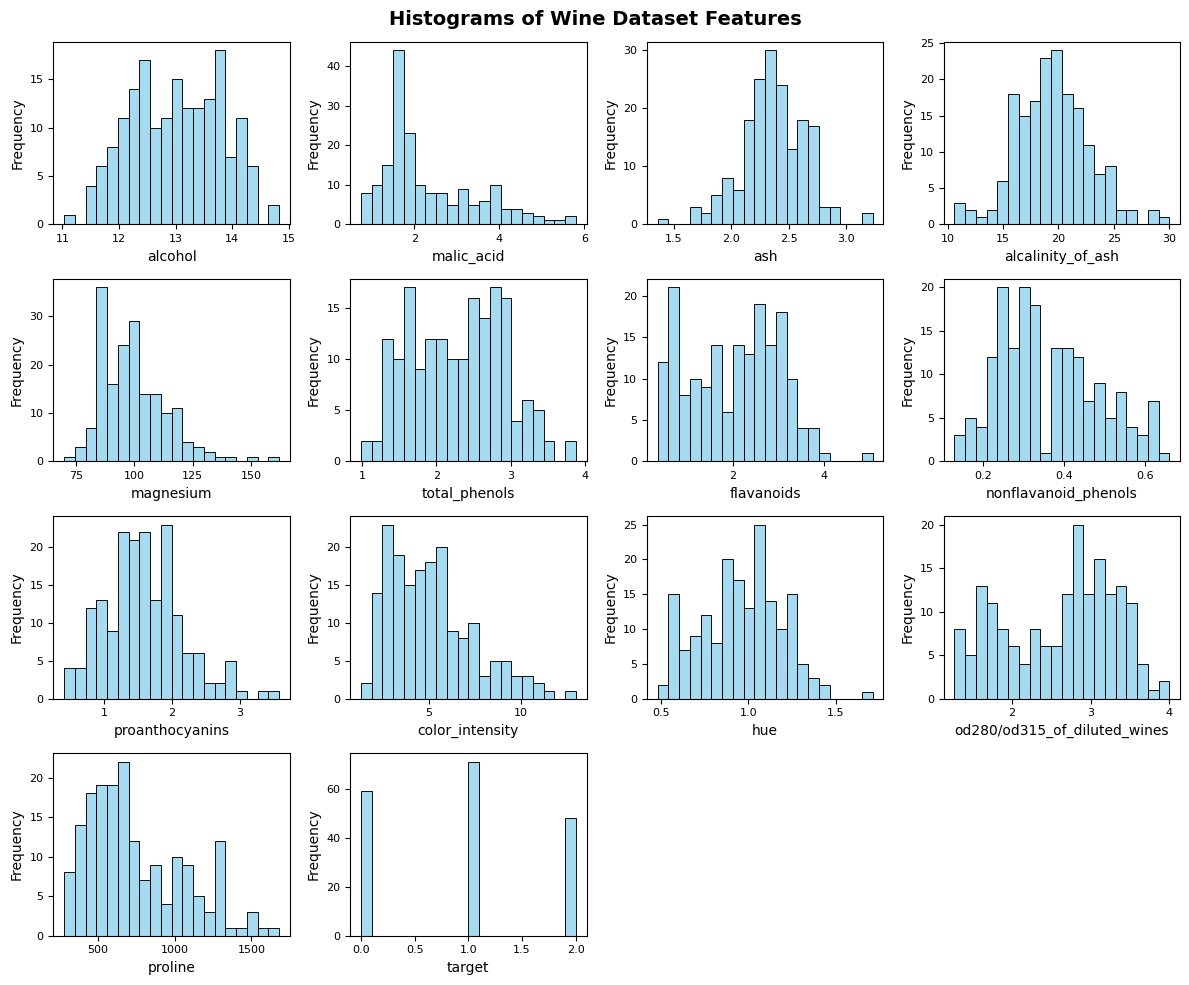

In [16]:

plt.figure(figsize=(12, 10))

# Plot histograms for each feature
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(df[column], bins=20, color='skyblue')
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.suptitle("Histograms of Wine Dataset Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


The histograms display the distribution of each chemical feature in the Wine dataset. They help identify the range, skewness, and spread of values for different attributes such as alcohol, malic acid, and flavanoids. This gives an initial understanding of data variability and highlights which features may strongly influence clustering or require scaling.


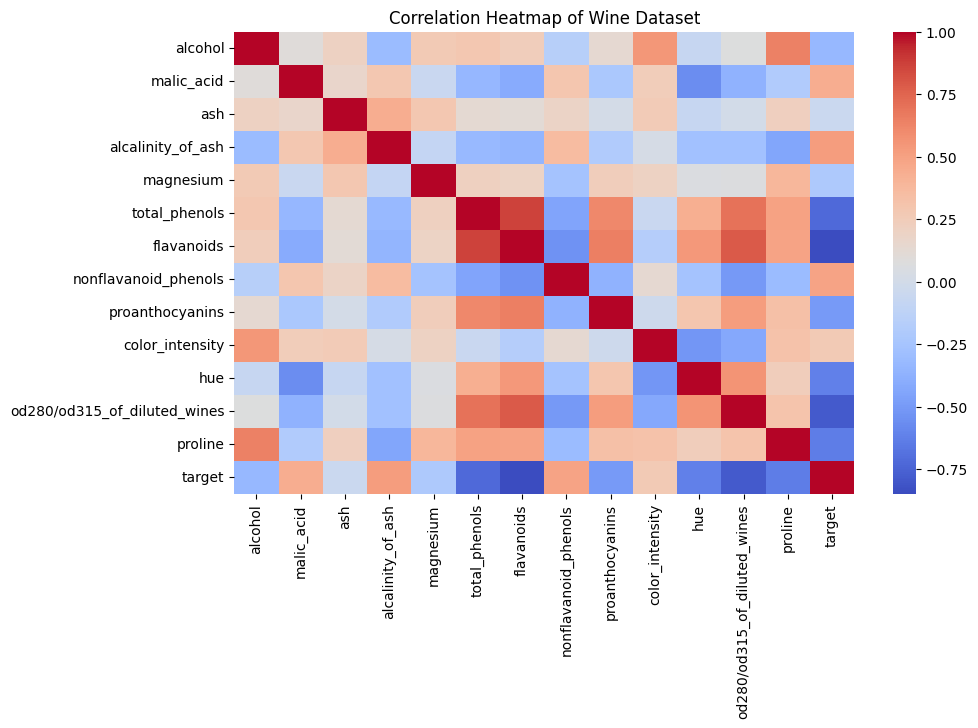

In [17]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()

### Correlation Heatmap Explanation

The correlation heatmap shows how strongly the 13 features of the Wine dataset are related to each other.  
- Each cell represents the **correlation coefficient** (ranging from -1 to +1) between two features.  
- **Positive correlation (closer to +1)** means that when one feature increases, the other tends to increase as well.  
- **Negative correlation (closer to -1)** means that when one feature increases, the other tends to decrease.  
- **Values near 0** indicate little to no linear relationship.  

By observing the heatmap:  
- We can identify **highly correlated features**, which often contain redundant information.  
- This is one reason why **dimensionality reduction (PCA)** is useful, as it removes redundancy and projects the data into a smaller set of uncorrelated components.


## Question 4.

Next, the objective would be to reduce the dimension of your dataset and do the clustering on it. Complete the following code for clustering in an object-oriented manner. Do the exact process as above: PCA dimension reduction followed by clustering.

A template code is provided below for your guidance.

```

class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = ______
        self.labels = ______
        self.kmeans = ______
        self.scaled_data = ______

    def load_data(self):
        """Load the Iris dataset"""
        iris = ________.________()
        self.data = iris.________
        return ________

    def preprocess_data(self):
        """Standardize the dataset"""
        scaler = _________.__________()
        self.scaled_data = scaler.________(________)
        return ________

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = ________.________(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.________(________)
        return ________

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = ________.________(________, ________)
        print(f"Silhouette Score: {score:.3f}")
        return ________

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(________[:, 0], ________[:, 1], c=________, cmap='viridis')
        plt.title("KMeans Clustering on Iris Dataset (Matplotlib)")
        plt.xlabel("________")
        plt.ylabel("________")
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV"""
        canvas = np.ones((______, ______, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
        scaled = (________[:, :2] * 100 + 250).astype(int)

        for i, point in enumerate(________):
            cv2.circle(canvas, tuple(point), 5, colors[________ % 3], -1)

        cv2.imshow("KMeans Clustering (OpenCV)", ________)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

```

The following code executes all the parts of the complete system.

```

  # Step 1: Create clustering object
    clustering = _________(n_clusters=3)

    # Step 2: Load dataset
    data = clustering.________()

    # Step 3: Preprocess dataset
    scaled_data = clustering.________()

    # Step 4: Apply KMeans clustering
    labels = clustering.________()

    # Step 5: Evaluate clusters
    score = clustering.________()

    # Step 6: Visualize with Matplotlib
    clustering.________()

    # Step 7: Visualize with OpenCV
    clustering.________()
  ```

In [18]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2

class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = None
        self.labels = None
        self.kmeans = None
        self.scaled_data = None
        self.reduced_data = None

    def load_data(self):
        """Load the Wine dataset"""
        wine = load_wine()
        self.data = wine.data
        return self.data

    def preprocess_data(self):
        """Standardize + reduce dimension with PCA"""
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.data)
        pca = PCA(n_components=2)
        self.reduced_data = pca.fit_transform(self.scaled_data)
        return self.reduced_data

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.fit_predict(self.reduced_data)
        return self.labels

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = silhouette_score(self.reduced_data, self.labels)
        print(f"Silhouette Score: {score:.3f}")
        return score

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib with cluster centers"""
        plt.scatter(self.reduced_data[:, 0], self.reduced_data[:, 1], 
                    c=self.labels, cmap='viridis', s=30, alpha=0.6)

        # plot cluster centers
        centers = self.kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], 
                    c='red', marker='X', s=200, label="Centroids")

        plt.title("KMeans Clustering on Wine Dataset (PCA-reduced)")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV with cluster centers"""
        canvas = np.ones((600, 600, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

        # scale points for display
        scaled_points = (self.reduced_data[:, :2] * 100 + 300).astype(int)
        scaled_centers = (self.kmeans.cluster_centers_[:, :2] * 100 + 300).astype(int)

        # plot data points
        for i, point in enumerate(scaled_points):
            cv2.circle(canvas, tuple(point), 4, colors[self.labels[i] % 3], -1)

        # plot cluster centers
        for center in scaled_centers:
            cv2.drawMarker(canvas, tuple(center), (0, 0, 0), 
                           markerType=cv2.MARKER_TILTED_CROSS, 
                           markerSize=25, thickness=2)

        cv2.imshow("KMeans Clustering (OpenCV)", canvas)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


### Explanation of Functions

- **`__init__`**: Initializes the clustering object with parameters like number of clusters and placeholders for data, labels, scaled data, reduced data, and the KMeans model.

- **`load_data()`**: Loads the **Wine dataset** from `scikit-learn`, which contains 178 samples and 13 chemical features of wines. Stores it in `self.data`.

- **`preprocess_data()`**: Standardizes the dataset using `StandardScaler` to bring all features to the same scale, then applies **PCA** to reduce the dataset from 13 dimensions to 2 principal components. Stores result in `self.reduced_data`.

- **`apply_kmeans()`**: Applies **KMeans clustering** with the chosen number of clusters (`n_clusters=3`) on the PCA-reduced dataset. Stores the cluster labels.

- **`evaluate_clusters()`**: Calculates the **Silhouette Score**, which measures how well-separated the clusters are (closer to 1 is better).

- **`visualize_clusters_matplotlib()`**: Plots the clusters using **Matplotlib**, showing the data points in 2D (PC1 vs PC2) colored by cluster labels.

- **`visualize_clusters_opencv()`**: Visualizes the same clusters using **OpenCV**, by plotting points on a blank canvas with different colors for different clusters.


Silhouette Score: 0.560


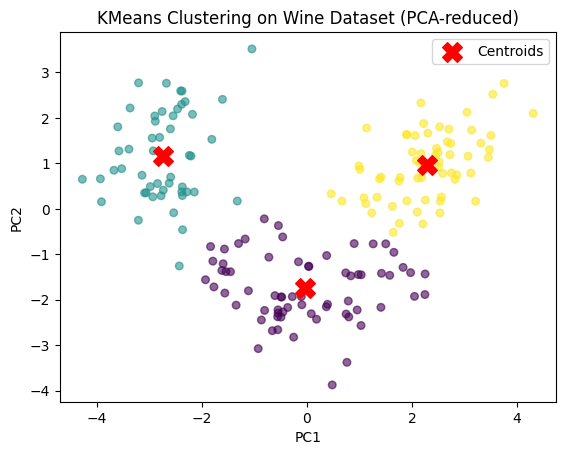

In [ ]:
# Step 1: Create clustering object
clustering = YourDataClustering(n_clusters=3)

# Step 2: Load dataset
data = clustering.load_data()

# Step 3: Preprocess dataset (scaling + PCA reduction)
scaled_data = clustering.preprocess_data()

# Step 4: Apply KMeans clustering
labels = clustering.apply_kmeans()

# Step 5: Evaluate clusters
score = clustering.evaluate_clusters()

# Step 6: Visualize with Matplotlib
clustering.visualize_clusters_matplotlib()

# Step 7: Visualize with OpenCV
clustering.visualize_clusters_opencv()


### PCA Scatter Plot Explanation

The PCA scatter plot reduces the 13-dimensional Wine dataset into 2 principal components (PC1 and PC2).  
- Each point represents a wine sample, plotted in the new 2D space.  
- PCA captures the directions of **maximum variance**, meaning most of the important information from the original dataset is preserved.  
- This visualization helps us see natural groupings or clusters in the data, which can later be used for clustering with KMeans.


### Overall Workflow Summary

1. **Data Loading**  
   - The **Wine dataset** is loaded from `scikit-learn`.  
   - It has 178 samples and 13 numerical features describing chemical properties of wine.

2. **Preprocessing (Scaling + PCA)**  
   - The data is standardized using `StandardScaler` so all features contribute equally.  
   - **PCA** reduces the dataset from 13 dimensions to 2 dimensions, making it easier to visualize and cluster.

3. **Clustering with KMeans**  
   - The **KMeans algorithm** groups the wines into 3 clusters (corresponding to the 3 wine cultivars).  
   - Cluster labels are assigned to each sample.

4. **Cluster Evaluation**  
   - The **Silhouette Score** is computed to check how well the clusters are separated.  
   - A higher score (closer to 1) means better-defined clusters.

5. **Visualization**  
   - **Matplotlib** is used to plot the PCA-reduced data in 2D with cluster colors.  
   - **OpenCV** provides an alternate visualization by plotting points on a graphical canvas.
 In summary, the pipeline shows how **dimensionality reduction (PCA)** combined with **unsupervised clustering (KMeans)** can help analyze and visualize high-dimensional datasets like Wine.
